In [ ]:
import numpy as np  
import matplotlib.pyplot as plt 
import scipy.signal as sp
import numpy.linalg as nplin
from gekko import GEKKO

from scipy.integrate import odeint
from plotfunc import plot_sets
from scipy.signal import place_poles

from plotfunc import plot_sets

In [ ]:
def check_feasible(x, y, tol=1e-6):
    c1 = 2*x - y <= 4 + tol
    c2 = y + x > 3 - tol
    c3 = y + 4*x >= -2 - tol
    return c1 and c2 and c3


Rozwiązanie graficzne:
  x = 2.333333
  y = 0.666667
  -y = -0.666667


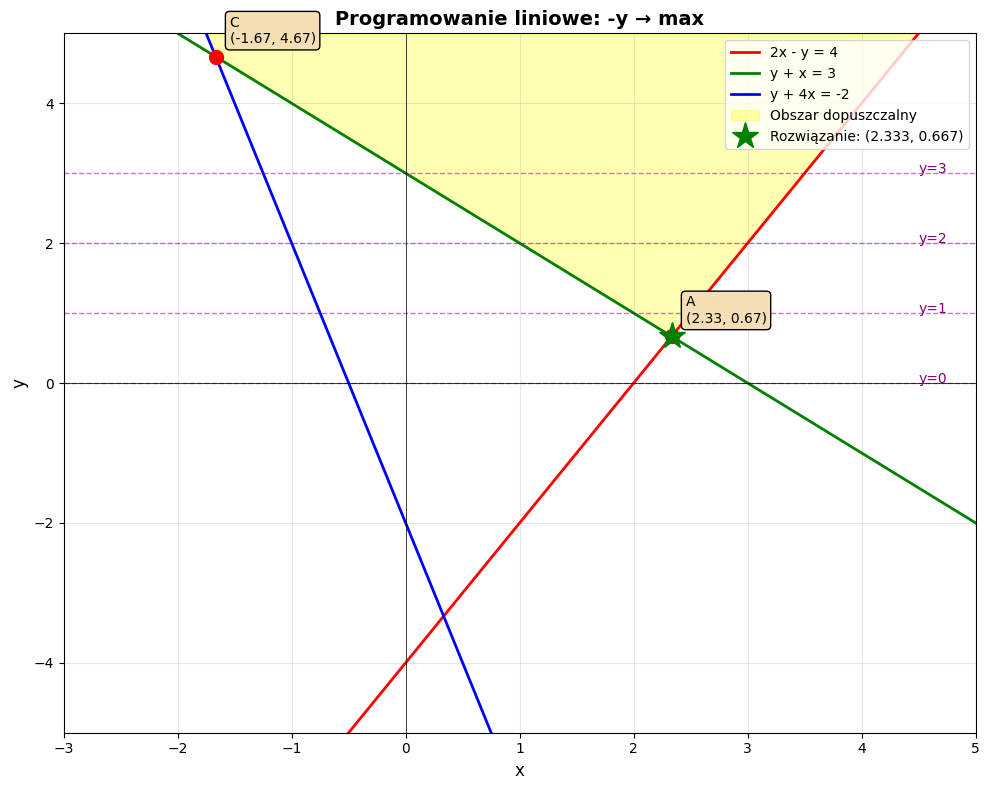

In [ ]:
#to jest w 100% skradzione z clouda nawet nie staram sie rzozumiec co tu sie dzieje gekko za to jest genialny, optimizer taki jak pytorch troche calkiem przyjemne liniowka boza tak zwana 
# Zakres dla x i y
x = np.linspace(-3, 5, 400)
    
# Ograniczenia jako funkcje y(x):
y1 = 2*x - 4
    
y2 = -x + 3
    
y3 = -4*x - 2
    
fig, ax = plt.subplots(figsize=(10, 8))
    
ax.plot(x, y1, 'r-', linewidth=2, label='2x - y = 4')
ax.plot(x, y2, 'g-', linewidth=2, label='y + x = 3')
ax.plot(x, y3, 'b-', linewidth=2, label='y + 4x = -2')
    
y_min = np.maximum(np.maximum(2*x - 4, -x + 3), -4*x - 2)
y_max = np.full_like(x, 5)  # górne ograniczenie dla wizualizacji
    
# Wypełnij obszar
ax.fill_between(x, y_min, y_max, where=(y_min <= y_max), 
                     alpha=0.3, color='yellow', label='Obszar dopuszczalny')
    
# Proste funkcji celu: -y = const, czyli y = const
for const in [0, 1, 2, 3]:
    ax.axhline(y=const, color='purple', linestyle='--', 
            alpha=0.5, linewidth=1)
    ax.text(4.5, const, f'y={const}', color='purple')
    
# Znajdź wierzchołki (przecięcia ograniczeń)
vertices = []
    
# Przecięcie 1 i 2: 2x - y = 4 i y + x = 3
# y = 2x - 4 i y = -x + 3
# 2x - 4 = -x + 3  =>  x = 7/3
x_12 = 7/3
y_12 = -x_12 + 3

if check_feasible(x_12, y_12):
    vertices.append((x_12, y_12, "A"))
    
# Przecięcie 1 i 3: 2x - y = 4 i y + 4x = -2
# y = 2x - 4 i y = -4x - 2
# 2x - 4 = -4x - 2  =>  x = 1/3
x_13 = 1/3
y_13 = 2*x_13 - 4
if check_feasible(x_13, y_13):
    vertices.append((x_13, y_13, "B"))
    
# Przecięcie 2 i 3: y + x = 3 i y + 4x = -2
# y = -x + 3 i y = -4x - 2
# -x + 3 = -4x - 2  =>  x = -5/3
x_23 = -5/3
y_23 = -x_23 + 3
if check_feasible(x_23, y_23):
    vertices.append((x_23, y_23, "C"))
    
# Zaznacz wierzchołki
for v in vertices:
    ax.plot(v[0], v[1], 'ro', markersize=10)
    ax.annotate(f'{v[2]}\n({v[0]:.2f}, {v[1]:.2f})', 
                xy=(v[0], v[1]), xytext=(10, 10),
                textcoords='offset points', fontsize=10,
                bbox=dict(boxstyle='round', facecolor='wheat'))
    
# Znajdź rozwiązanie - punkt z najmniejszym y (największym -y)
if vertices:
    solution = min(vertices, key=lambda v: v[1])
    ax.plot(solution[0], solution[1], 'g*', markersize=20, 
            label=f'Rozwiązanie: ({solution[0]:.3f}, {solution[1]:.3f})')
    print(f"\nRozwiązanie graficzne:")
    print(f"  x = {solution[0]:.6f}")
    print(f"  y = {solution[1]:.6f}")
    print(f"  -y = {-solution[1]:.6f}")
    
ax.set_xlim(-3, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Programowanie liniowe: -y → max', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
m = GEKKO()

x=m.Var(value=0,lb=-10,ub=10)
y=m.Var(value=0,lb=-10,ub=10)

m.Equation(2*x-y <= 4)
m.Equation(y+x>3)
m.Equation(y+4*x>=-2)

m.Obj(y) #gekko robi min by default 

m.options.IMODE=3 

m.solve(disp=False)

print(f'x= {x.value[0]:.6f}')
print(f'y= {y.value[0]:.6f}')


x= 2.333333
y= 0.666667


pozderki oba rozwiazania sie zgadzaja ale gekko 10000x prostszy 

In [ ]:
def f(x):
    return x**4-4*x**3-2*x**2+12*x+9

In [ ]:
model = GEKKO()

x=model.Var(value=1,lb=0)

model.Equation(x>=0)

model.Obj(x**4-4*x**3-2*x**2+12*x+9) #gekko robi min by default 

model.options.IMODE=3 
model.options.SOLVER=3

model.solve(disp=False)

y=f(x.value[0])

print(f'x= {x.value[0]:.10f}')
print(f'y= {y:.6f}')


x= 0.0000000000
y= 9.000000


kto by sie spodziewał ze w 0 minimum dla takiej funkcji 

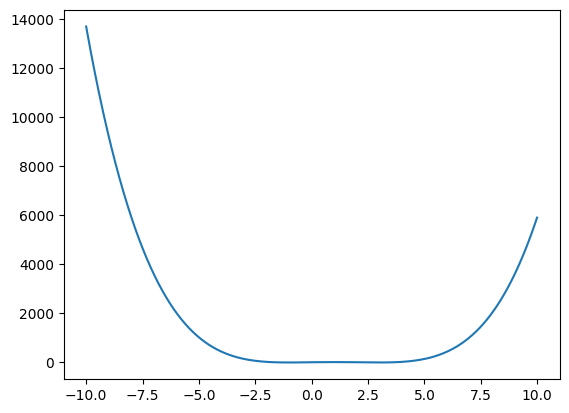

In [ ]:
t=np.arange(-10,10,0.01)
y=f(t)

plt.figure
plt.plot(t,y)
plt.show()


In [ ]:
m2=GEKKO()

m2.options.IMODE=6

n_points = 201
m2.time = np.linspace(0, 1, n_points)

x= m2.Var(value=1)

m2.fix_initial(x, val=1) # x(0)=1
m2.fix_final(x, val=3) # x(1)=3

J = m2.Var(value=0)
m2.fix_initial(J, val=0)

global t
t = m2.Param(value=m2.time)

integrand = 24*x*t + 2*x.dt()**2 - 4*t #x.dt to x prim

m2.Equation(J.dt() == integrand)

J_f = m2.FV()
J_f.STATUS = 1 

m2.Connection(J_f, J, pos2='end')

m2.Obj(J_f)

m2.options.SOLVER=3

m2.solve(disp=False)

global x_res
x_res=np.array(x.value)
J_res=J_f.value[1]

print(f'minimalna wartosc calki= {J_res:.6f}')
#print(x_res)

minimalna wartosc calki= 32.729852


C:\Users\janek\AppData\Local\Temp\ipykernel_18312\3662759226.py:35: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x_res=np.array(x.value)


(201,)


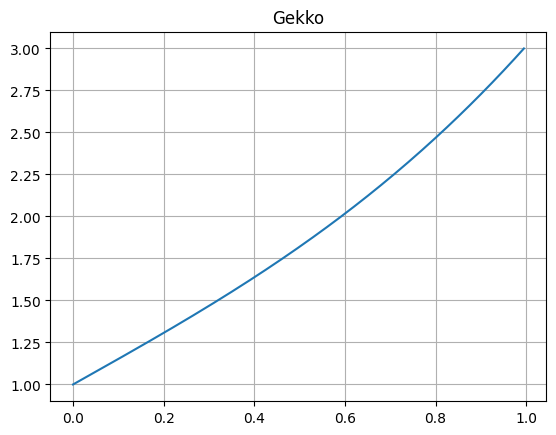

In [ ]:
print(x_res.shape)



plt.Figure
plt.plot(t[:-1],x_res[:-1])
plt.title("Gekko")
plt.grid(True)
plt.show()

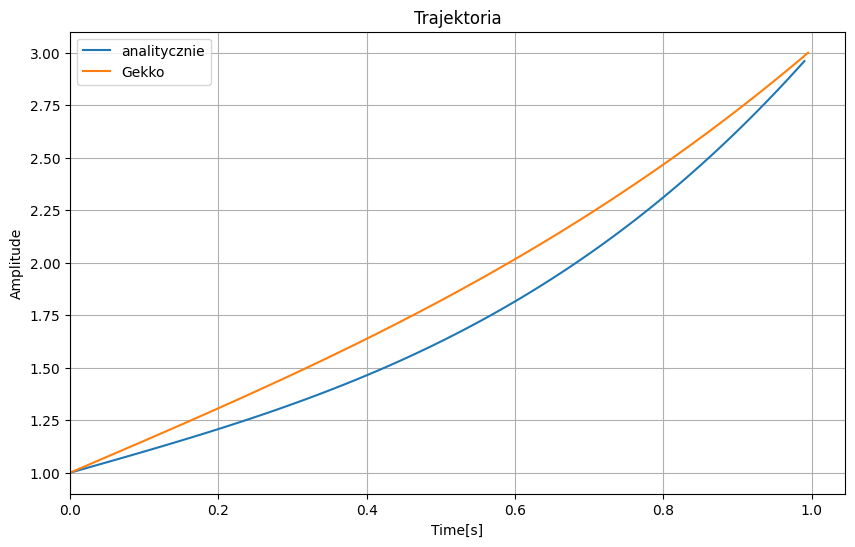

In [ ]:
def func(t):
    t = np.asarray(t)
    return t**3 + t + 1

t_a = np.arange(0.0, 1.0, 0.01)
trajectory = func(t_a)
plot_sets('Trajektoria', [t_a, trajectory, 'analitycznie'],[t[:-1],x_res[:-1],"Gekko"])